# <font color=green><strong>BONUS 6.</strong></font>

<p align=justify>Наверняка вы уже сталкивались с ситуацией, когда приходилось применить какую-то функцию сразу к нескольким элементам списка.</p>
<p align=justify>Это очень распространённая ситуация при работе с наборами данных.</p>
<p align=justify>Например, у вас есть список с изображениями, все эти изображения разных размеров. Однако чтобы подать ваши картинки, например, в нейронную сеть, их необходимо привести к единому размеру, то есть к каждой картинке из списка вам необходимо применить функцию для изменения её размера.</p>
<p align=justify>Ранее мы проводили подобные операции с помощью цикла <code>for</code>: создавали цикл по элементам списка и в цикле применяли функцию к элементу.</p>
<p align=justify>Оказывается, в Python можно, используя возможности итераторов, применять функции к элементам списка и без циклов. И это даёт нам сразу несколько преимуществ:</p>
<ul>
<li>Простота кода — код становится короче (вплоть до одной строки) и выглядит более лаконичным.</li>
<li><p align=justify>Скорость — возможности, которые мы с вами рассмотрим, в большинстве случаев работают быстрее, чем использование функции в цикле.</p></li></ul>

## <center><font color=green><strong>ФУНКЦИЯ MAP</strong></font></center>

<p align=justify>Представим, что у нас есть набор данных (пусть это будет список) об оценках нашей видеоигры десятками тысяч пользователей. Каждая оценка представлена отдельным элементом в списке масштабе от 0 до 10, а нам было бы удобнее видеть её в масштабе от 0 до 100 (такая операция называется масштабированием).</p>

<p align=justify>Итак, у нас есть итерируемый объект — список, и нам необходимо совершить преобразование (масштабирование) с каждым его элементом.</p>

---

<p align=justify>Решение такого типа задач вам уже известно — проход по элементам в цикле. Но существует более простой, лаконичный и, главное, быстрый способ, который мы и изучим в этом юните.</p>

---

Начнём, как и всегда, с примера.

<p align=justify>В задачах обработки естественного языка иногда имеет значение не только само слово, но и его длина.</p>

<p align=justify>Перед нами стоит следующая небольшая задача: вычислить длину каждого слова из нашего набора данных, чтобы в дальнейшем использовать эту информацию для анализа текста.</p>

<p align=justify>Пусть нам дан список <code>names</code> с именами. Давайте составим новый список длин имён <code>lens_list</code> из списка <code>names</code>. Самое простое решение — воспользоваться циклом.</p>


```python
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']

# Создаём пустой список, куда будем заносить результаты
lens_list = []
# Создаём цикл по элементам списка names
for name in names:
    # Вычисляем длину текущего слова
    length = len(name)
    # Добавляем вычисленную длину слова в список
    lens_list.append(length)
 
print(lens_list)
# [4, 6, 5, 9, 8, 3]
```

Напишем функцию get_length, которая возвращает длину переданного в неё слова:

```python
# Объявляем функцию для вычисления длины
def get_length(word):
    return len(word)
```

<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="270px"><font color=black size=3>
<dd>Теперь применим эту функцию к списку <code>names</code> с помощью специальной встроенной в Python функции <code>map()</code>.<br><br> Она позволяет преобразовать каждый элемент итерируемого объекта по заданной функции.<br><br><br>
<strong>Аргументы функции</strong> <code>map()</code>:<br><br>
<ol>
<li>Функция, которую необходимо применить к каждому элементу.</li><br>
<li>Итерируемый объект (например, список).</li>
</ol><br>
Функция <code>map()</code> возвращает объект типа <code>map</code>.</dd>
      </font></td>
    </tr>
  </tbody>
</table>

```python
 # Объявляем функцию для вычисления длины
def get_length(word):
    return len(word)
# Применяем функцию get_length к каждому элементу списка
lens = map(get_length, names)
# Проверим, что переменная lens — это объект типа map:
# Для этого воспользуемся функцией isinstance
print(isinstance(lens, map))
# Будет напечатано:
# True
```

Ниже представлена схема работы функции `map()` на нашем примере:

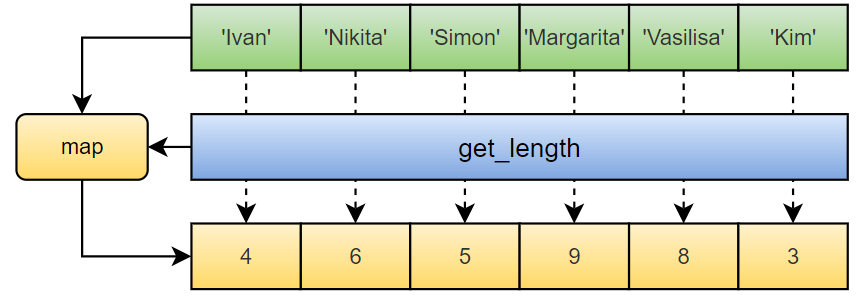

<p align=justify>Объект типа <code>map</code> на самом деле является разновидностью итератора, а значит можно получить его элементы, последовательно применяя функцию <code>next()</code>:</p>

```python
# Последовательно получаем элементы итератора map
print(next(lens))
print(next(lens))
print(next(lens))
# Будет напечатано:
# 4
# 6
# 5
```

<p align=justify>Кроме того, объекты итератора можно сразу занести в список, обернув результат работы функции <code>map()</code> в функцию <code>list()</code>:</p>

```python
# Оборачиваем содержимое итератора map в список
lens_list = list(map(get_length, names))
print(lens_list)
# Будет напечатано:
# [4, 6, 5, 9, 8, 3]
```

<p align=justify>Вероятно, вы обратили внимание, что функция <code>get_length</code> является очень простой и короткой: она в одну строку выполняет действие и возвращает значение.</p>

<p align=justify>Чтобы не создавать такую функцию отдельно в исходном коде скрипта, напишем аналогичную ей lambda-функцию и применим её с помощью map. Сразу же воспользуемся функцией <code>list()</code>, чтобы получить весь список значений из итератора <code>map</code>:</p>

```python
lens = list(map(lambda x: len(x), names))
print(lens)
# Будет напечатано:
# [4, 6, 5, 9, 8, 3]
```

Как видите, мы в одну строку получили список длин набора слов.

<p align-justify>Итак, вы увидели, что использование <code>map()</code> вместо цикла сокращает написание кода вплоть до одной строки. В то же время <code>map()</code> может выполняться даже немного быстрее обычных циклов.</p>
<p align=justify>В общем случае <code>map()</code> может быть использована в тех случаях, когда у вас есть набор данных (в виде итерируемого объекта) и вам необходимо совершить над каждым его элементом определённое действие: масштабировать картинку, выделить из каждого предложения главное слово, записать объект в отдельный файл и т. д.</p>
<p align=justify>Тогда вы можете выделить ваше действие в отдельную функцию и применить её к каждому элементу из набора данных, используя <code>map()</code></p>

## <center><font color=green><strong>ФУНКЦИЯ FILTER</strong></font></center>

Часто требуется отобрать из итератора элементы, удовлетворяющие определённому условию.

Например, из списка оценок нашей видеоигры от пользователей необходимо выделить только те оценки, которые выше `70` баллов. Такая операция называется фильтрацией — мы отсекаем данные, которые не проходят фильтр. 

Мы уже решали подобные задачи с помощью цикла и условного оператора, но теперь мы расширим наши возможности с помощью специальных функций.

Ранее с помощью функции `map()` мы получили список длин имён `lens_list = [4, 6, 5, 9, 8, 3]`. Теперь давайте создадим новый список `even_list`, в котором будут содержаться только чётные числа из списка `lens_list`.

Для начала решим нашу задачу с помощью цикла:

In [ ]:
lens_list = [4, 6, 5, 9, 8, 3]
even_list = []
# Создаём цикл по элементам списка
for item in lens_list:
    # Проверяем условие, что текущий элемент списка чётный
    if item % 2 == 0: # Если условие выполняется,
        # добавляем элемент в новый список
        even_list .append(item)
print(even_list)
# Будет напечатано:
# [4, 6, 8]

[4, 6, 8]


<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="320px"><font color=black size=3>
<dd>Однако, эту задачу можно решить с помощью специальной встроенной в Python функции <code>filter()</code>. Она позволит <br><br>отфильтровать переданный ей итерируемый объект и оставить в нём только те элементы, которые удовлетворяют <br><br>условию.<br><br>Её использование аналогично применению функции <code>map()</code>.<br><br><br>
<strong>Аргументы функции <code>filter()</code>:</strong><br><br>
<ol>
<li>Функция, которая должна возвращать <code>True</code>, если условие выполнено, иначе возвращается <code>False</code>.</li><br>
<li>Итератор, с которым производится действие.</li>
</ol>
<br>Функция <code>filter()</code> возвращает объект типа <code>filter</code>.</dd>
      </font></td>
    </tr>
  </tbody>
</table>

Напишем функцию, которая возвращает `True`, если число делится на 2 без остатка, то есть является чётным. В противном случае функция возвращает `False`:

In [ ]:
# Объявляем функцию для проверки чётности числа
def is_even(num):
    if num % 2 == 0:
        return True
    return False

Теперь применим эту функцию к списку чисел с помощью `filter()`:

In [ ]:
lens_list = [4, 6, 5, 9, 8, 3]
# Применяем функцию is_even к каждому элементу списка
even = filter(is_even, lens_list)
# Убедимся, что even — объект типа filter
print(isinstance(even, filter))
# Будет напечатано:
# True

Ниже представлена схема работы функции `filter()` на нашем примере:

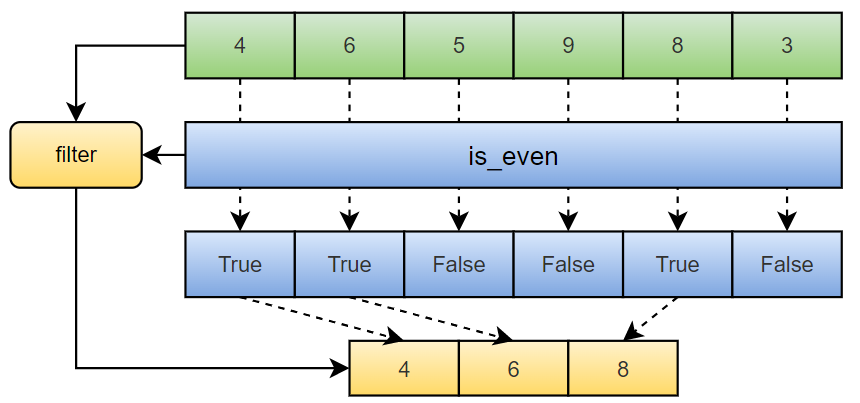

В функцию `filter()` подаётся список `lens_list` и функция `is_even()`. 

Функция `filter()` вызывает функцию `is_even()` поочерёдно для каждого элемента из списка. 

В свою очередь функция `is_even()` возвращает `True` или `False` в зависимости от того, является ли число из списка чётным. 

Те элементы, для которых проход через функцию `is_even()` оказался успешным (было выведено значение `True`), помещаются в результат. Те элементы, для которых функция `is_even()` выдала `False`, отбрасываются.

Объект `filter` также является итератором. Сохраним все элементы из него в список и напечатаем этот список:

```python
print(list(even))
# Будет напечатано:
# [4, 6, 8]
```

Функция `is_even()` тоже устроена довольно просто. Мы могли создать её и с помощью lambda-выражения при вызове `filter()`. Выражение `x % 2 == 0` также возвращает `True` или `False` в зависимости от того, является ли число чётным.

In [ ]:
lens_list = [4, 6, 5, 9, 8, 3] 
# Применяем lambda-функцию к каждому элементу списка
even = filter(lambda x: x % 2 == 0, lens_list)
print(list(even))
# Будет напечатано:
# [4, 6, 8]

<p align=justify>Таким образом, мы смогли в одну строку отобрать только те числа, которые делятся на <code>2</code>. Для этого мы воспользовались функцией <code>filter()</code>, внутри которой создали временную lambda-функцию. Такой механизм называется созданием функций «налету».</p>

<p align=justify>В общем случае функция <code>filter()</code> может быть использована в тех случаях, когда у вас есть набор данных (в виде итерируемого объекта) и вам необходимо отбросить элементы, которые не проходят по условию (оценка меньше 70 баллов, нечётные числа, «битые» картинки или другие файлы).</p>

<p align=justify>Тогда вы можете создать отдельную функцию, которая будет возвращать <code>True</code> или <code>False</code> в зависимости от условия. Применив эту функцию к данным с помощью <code>filter()</code>, вы оставите в своих данных только те элементы, для которых функция вернула <code>True</code>.</p>

## <center><font color=green><strong>КОНВЕЙЕРЫ ИЗ MAP И FILTER</strong></font></center>

<p align=justify>Иногда возникает задача выполнить сразу несколько действий с объектами из итератора. Например, вы хотите масштабировать данные об оценках вашей видеоигры пользователями, а затем отфильтровать оценки. Такие преобразования называются <strong>конвейерными</strong>.</p>

<p align=justify>Для этого необязательно каждый раз после применения <code>map()</code> или <code>filter()</code> получать список элементов. Объекты <code>map</code> и <code>filter</code>, как и любые другие итераторы, можно подставлять в эти же функции <code>map()</code> и <code>filter()</code>.</p> 

Давайте вернёмся к нашей задаче об именах. Нам задан список имён names:

```python
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']
```
<p align=justify>Допустим, вначале мы хотим отобрать только те имена, которые состоят из пяти и более букв, а затем посчитать, сколько раз в таких словах встречается буква <code>'А'</code>.</p> 

<p align=justify>Отфильтруем наш список по условию <code>len(x) >= 5</code> с помощью функции <code>filter()</code>.</p>
<p align=justify>Напишем функцию, которая приводит имя к верхнему регистру с помощью метода строки <code>upper()</code>, а затем методом строки <code>count()</code> вычисляет количество символов <code>'A'</code>. Функция возвращает кортеж (имя, число букв <code>'A'</code>). Нашу функцию-преобразование применим к отфильтрованным данным с помощью <code>map()</code>.
Конечный результат обернём в список с помощью функции <code>list()</code>.</p>

Наш конвейер, состоящий из `filter()` и `map()`, будет иметь вид:

In [ ]:
# Отбираем имена из пяти и более букв
long_names = filter(lambda x: len(x) >= 5, names)
# Все отобранные имена переводим в верхний регистр и считаем число букв А в них
# Результат сохраняем в виде кортежа (имя, число букв "A")
count_a = map(lambda x: (x, x.upper().count('A')), long_names)
# Переводим объект map в list и печатаем его
print(list(count_a))
 
# Будет напечатано:
# [('Nikita', 1), ('Simon', 0), ('Margarita', 3), ('Vasilisa', 2)]

<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="130px"><font color=black size=3>
<dd>
Выгодное отличие использования конвейеров без создания списков из итераторов заключается в повышении<br><br>быстродействия скрипта. Вы не тратите время на распаковку содержимого итератора в список, и это существенно<br><br>повышает производительность.</dd>
      </font></td>
    </tr>
  </tbody>
</table>

In [ ]:
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']
# Создаём пустой список, в который будем добавлять результаты
count_a = list()
# Создаём цикл по элементам списка names
for name in names:
    # Проверяем условие, что длина имени больше либо равна 5
    if len(name) >= 5:
        # Добавляем в итоговый список кортеж (имя, число букв "A")
        count_a.append((name, name.upper().count('A')))
print(count_a)
 
# Будет напечатано:
# [('Nikita', 1), ('Simon', 0), ('Margarita', 3), ('Vasilisa', 2)]

## <center><font color=green><strong>ФУНКЦИЯ ZIP</strong></font></center>

<p align=justify>Иногда возникает необходимость одновременно получать и обрабатывать элементы из нескольких последовательностей. Представьте, что перед вами несколько параллельных линий конвейера, по каждой из которых идёт отдельная продукция, и вам необходимо следить за каждой из этих линий.</p>
<p align=justify>Пример из профессии: у вас может возникнуть задача по порядку получать из разных баз данных элементы, которые на самом деле являются смысловыми парами: например, товары и их цены, покупатели и их покупки, студенты и их баллы за экзамен и т. д.</p>

<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="200px"><dd><font color=black size=3>
Для такого совместного использования нескольких коллекций объектов предусмотрена функция <code>zip()</code>. <br><br>Она принимает в качестве аргументов через запятую итерируемые объекты.<br><br>Результат работы функции <code>zip()</code> — специальный итератор <code>zip</code>. При требовании получить следующий объект <br><br>(вызове <code>next()</code>) итератор выдаёт кортеж, в котором по порядку перечислено по одному объекту из каждого аргумента.<br><br>
В итоге мы получаем параллельную обработку нескольких коллекций объектов сразу.
      </font></td>
    </tr>
  </tbody>
</table>

Рассмотрим пример задачи.

<p align=justify>Пусть данные о фамилиях и отчествах студентов по каким-то причинам хранятся в разных местах, например в двух разных списках. Нам бы хотелось вывести их попарно на экран.</p>

Создадим два списка: в одном будут фамилии, в другом — имена студентов.

<p align=justify>Чтобы напечатать их попарно, получим из них объект zip и пройдёмся по нему в цикле for. На каждой итерации цикла объект <code>zip</code> будет возвращать кортеж из двух элементов — фамилии и имени. Для удобства кортеж из элементов <code>zip</code> мы сразу же распаковываем в цикле в понятные переменные surname и name.</p>

Итоговый код:

```python
surnames = ['Ivanov', 'Smirnov', 'Kuznetsova', 'Nikitina']
names = ['Sergej', 'Ivan', 'Maria', 'Elena']
# Создаём цикл по элементам итератора zip — кортежам из фамилий и имён
for surname, name in zip(surnames, names):
    print(surname, name)
# Будет напечатано:
# Ivanov Sergej
# Smirnov Ivan
# Kuznetsova Maria
# Nikitina Elena
```

Ниже представлена схема работы функции `zip()` на нашем примере:

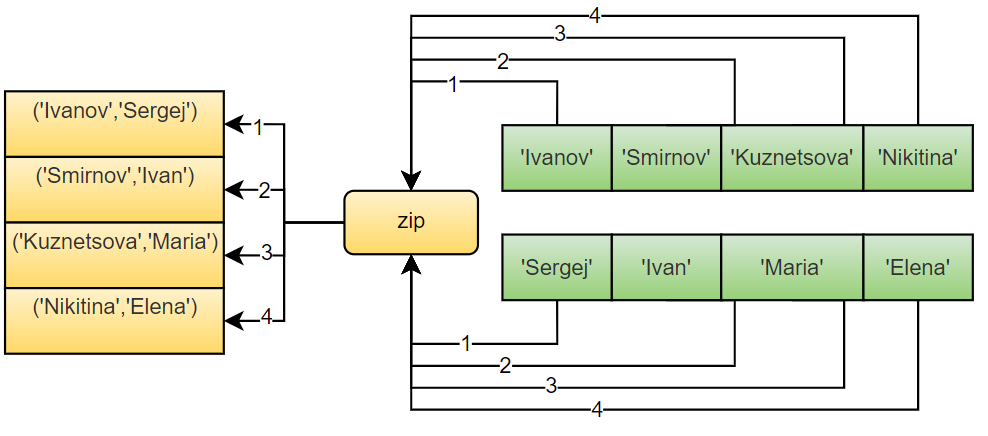

<p align=justify>В функцию <code>zip()</code> подаются два списка: <code>surnames</code> и </code>names</code>. В результате <code>zip()</code> создаёт из двух этих объектов специальный итератор.</p> 

<p align=justify>При каждом новом обращении к полученному <code>zip</code>-итератору с помощью <code>next()</code> он выдаёт следующую пару элементов (кортеж) из каждого списка. Пары образуются последовательно: например, первый элемент из списка <code>surnames</code> образует пару с первым элементом из списка <code>names</code> и т. д.</p>

<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="70px"><dd><font color=black size=3>
<strong>Важное замечание: </strong><code>zip</code> перестаёт выдавать элементы тогда, когда заканчиваются элементы в самом коротком итераторе.
      </font></td>
    </tr>
  </tbody>
</table>

Например, мы потеряли половину списка имён, но список фамилий при этом не поменялся:

```python
surnames = ['Ivanov', 'Smirnov', 'Kuznetsova', 'Nikitina']
names = ['Sergej', 'Ivan']
```

Сгруппируем объекты из списков с помощью `zip()` и будем печатать пары Фамилия Имя:

```python
# Создаём цикл по элементам итератора zip — кортежам из фамилий и имён
for surname, name in zip(surnames, names):
    print(surname, name)
 
# Будет напечатано:
# Ivanov Sergej
# Smirnov Ivan
```

Как видите, напечатано только две строки, поскольку в списке names содержалось только два имени.

<p align=justify>Используйте объект `zip`, когда требуется получить наборы объектов из нескольких итерируемых объектов и обрабатывать их одновременно.</p>

## <center><font color=green><strong>ДОПОЛНИТЕЛЬНЫЕ ВОЗМОЖНОСТИ</strong></font></center>

<p align=justify>В Python существуют дополнительные возможности для решения задач с помощью итераторов и функций. Они находятся в модуле <font color=lightgreen> functools</font>.</p>

ДОПОЛНИТЕЛЬНО:

Пока что большая часть функционала из модуля *functools* вам не потребуется, однако вы можете ознакомиться с функциями, которые там содержатся, в [официальной документации](https://docs.python.org/3/library/functools.html).

В этом юните в качестве примера разберём функцию `reduce()` из этого модуля.

<table>
  <tbody>
    <col width="1000x" ></col>
    <tr>
      <td td bgcolor=lightgreen height="90px"><dd><font color=black size=3>
<code>reduce()</code>, как и <code>map()</code> или <code>filter()</code>, в качестве первого аргумента принимает функцию, в качестве второго — итерируемый<br><br> объект (например, список).
      </font></td>
    </tr>
  </tbody>
</table>

`reduce()` выполняет следующие действия:

1.   Берёт первый и второй элементы из итератора, применяет к ним переданную функцию.

2.   Запоминает значение, которое получено в шаге 1, и подставляет его в качестве первого аргумента в функцию. В качестве второго аргумента `reduce()` получает следующий элемент из генератора. 

3.   Действие 2 повторяется до тех пор, пока в итерируемом объекте есть элементы.

4.   Функция `reduce()` возвращает последнее значение, которое вернула функция.  

Рассмотрим работу данной функции на примере — применим с помощью `reduce()` lambda-функцию произведения двух аргументов к списку чисел от 1 до 5, полученному с помощью функции `range(1, 6)`:

```python
# Импортируем модуль functools
from functools import reduce

iterable = list(range(1, 6))
# Применяем lambda-функцию для вычисления к произведения к списку
reduced = reduce(lambda x,y: x*y, iterable)
print(reduced)
# Будет напечатано:
# 120
```

Фактически мы посчитали 5! (факториал числа 5).

---

Как это произошло:

1.   Были умножены первые два элемента из итератора: .

2.   Затем результат (число 2) умножили на следующий элемент — число 3. <br> Получили: $2 * 3 = 6$

3.   Затем действие 2 повторялось с новыми числами:<br>
$6 * 4 = 24$<br>
$24 * 5 = 120$

4.   Наконец, `reduce()` вернула результат, полученный в ходе последнего запуска функции.

---

Ниже представлена схема работы функции `reduce()` на нашем примере:

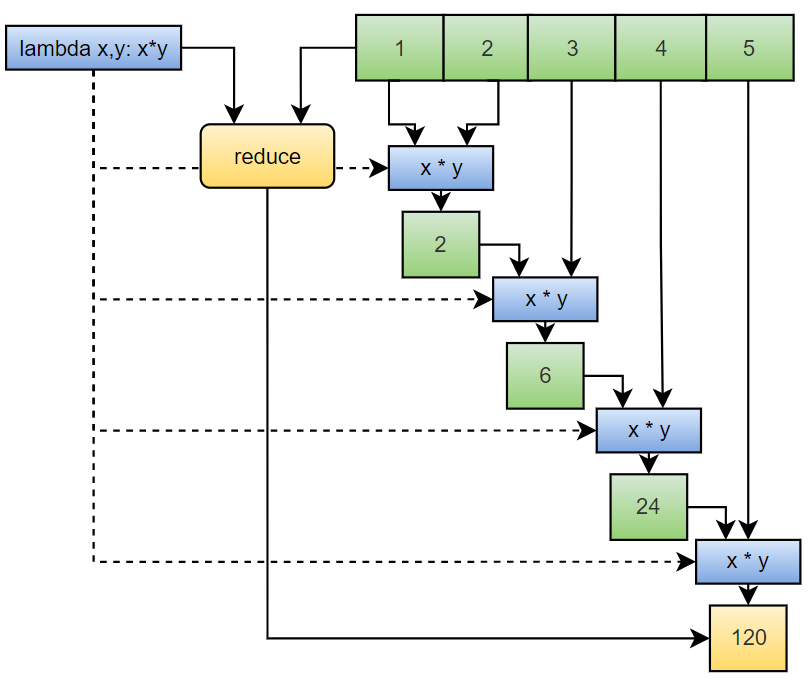

Описанное выше умножение также можно записать следующим образом:

```python
((((1*2)*3)*4)*5) = 120
```

Таким образом, мы вычислили факториал от 5, не используя циклы и рекурсивные функции.